
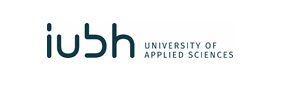


# Knowledge.light <a class="anchor" id="Start"></a>

###*Press **STRG + F9** to start*

### Knowledge.light aktivieren <a class="anchor" id="import-data"></a>

> So aktivierst Du **Knowledge.light**:<br>
<br> **GoogleColab**: Klicke in der Menüleiste auf *Laufzeit* und dann auf *Alle ausführen* oder benutze die Tastenkombination *Ctrl + F9*. <br> Es gibt ein Inhaltsverzeichnis auf der linken Bildschrimseite (ganz oben links direkt unter dem GoogleColab-Symbol).<br> Du kannst *Zellen ausblenden*, indem Du auf das *dreieckige Symbol* neben dieser Zelle klickst.<br><br> 

In [36]:
#@title # Links

# importing libraries
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, fixed
import matplotlib.pyplot as plt


# expanding display size for pandas
try:

  pd.set_option('display.max_columns', None)
  pd.set_option('display.max_colwidth', None)
  pd.set_option('display.max_rows', None)
  pd.set_option('display.width', 2000)
except:
  pass

# google drive shareable link for the database
url = "https://drive.google.com/file/d/1gcVKPxzIjC8GHouelhwioxgw8iMnv6uX/view?usp=sharing"
urlalt = "https://drive.google.com/file/d/1S57sIzNr8fnNJvMzGQjbnM_hCElWAv_1/view?usp=sharing"
# original data url = 'https://drive.google.com/file/d/1r8iVNzZhjjq5wJfc8u2Fy-GSk9iyaMQ-/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

# google drive shareable link for the links

#urllinks ="https://drive.google.com/file/d/11NtMsH3j-4L46JZj89XnCMye71nRCddC/view?usp=sharing"
urllinks = "https://drive.google.com/file/d/1lXXwsUdU1jOE_qnfIWUqfGfr3sh1wmC1/view?usp=sharing"
pathlinks = 'https://drive.google.com/uc?export=download&id='+urllinks.split('/')[-2]

# try to import database from google drive | except with import database from github
try:
  df = pd.read_csv(path)
  df = df.fillna("")
except:
  
  # df = pd.read_csv("https://raw.githubusercontent.com/code202020/load/main/ModuleSo.csv")
  df = pd.read_csv("https://raw.githubusercontent.com/code202020/load/main/dbModule.csv")
  print("used github database")
  df = df.fillna("")

# try to import the links from google drive | except with importing links from github
try:
  links = pd.read_csv(pathlinks)
  links = links.fillna("")
except:
  print("used github for the links")
  links = pd.read_csv("https://raw.githubusercontent.com/code202020/load/main/links.csv")
  links = links.fillna("")

# drop duplicates
try:
  df = df.drop_duplicates(subset= ["Name Vorleistung", "Modul","Kurscode"], keep="last")
except:
  print("could not drop duplicates")
  pass

# convert links to hyperlinks
def make_clickable(val):
    return '<a target="_blank" href="{}">{}</a>'.format(val, val)

# defining the functions to search the database
def searchModulhandbuch(key):
    key = key.lower()
    try:
        v = links[links["Studiengang"].str.lower().str.contains(key, na = False)]
        print("\n")
        if key == "":
                key = "None"
                return 
        display(v[["Studiengang","Link"]].style.format({'Link': make_clickable}))  
    except:
          return
        # print("failed")
################################
def searchKurscode(key):
    key = key.lower()
    try:
        v = df[df["Kurscode"].str.lower().str.contains(key, na = False)]
        print("\n")
        if key == "":
          return
        v = v.reset_index(drop = True)
        display(v[["Name Vorleistung", "Modul","Modulcode","Kurscode"]].style.format({'URL': make_clickable}))  
    except:
        return
        print("failed")
################################
def searchAll(key):
    key = key.lower()
        
    try:
      
      v = df[df["Name Vorleistung"].str.lower().str.contains(key, na = False)]
      print("\n")

      print("\n","Summe der Suchanfrage: ",v["ECTS"].sum(),"ECTS")
      if key == "":
              key = "None"
              return
      
      display(v.style.format({'URL': make_clickable}))  
    except:
        return
        #print("failed")
 ################################       
def searchModule(key):
    key = key.lower()
    try:
        m = df[df["Modul"].str.lower().str.contains(key, na = False)]
        print("\n")
        print("\n","Summe der Suchanfrage: ",m["ECTS"].sum()," ECTS")
        if key == "":
                key = "None"
                return
        m = m.reset_index(drop = True)
        display(m.style.format({'URL': make_clickable}))  
    except:
        return
        print("failed")

################################

def searchKursname(key):
    key = key.lower()
    try:
        k = df[df["Kursname"].str.lower().str.contains(key, na = False)]
        print("\n")
        print("\n","Summe der Suchanfrage: ",k["ECTS"].sum()," ECTS")
        if key == "":
                key = "None"
                return 
        k = k.reset_index(drop=True)
        display(k.style.format({'URL': make_clickable}))  
    except:
        return
        print("failed")
################################
def searchModulcode(key):
    key = key.lower()
    try:
        mc = df[df["Modulcode"].str.lower().str.contains(key, na = False)]
        print("\n")
        print("\n","Summe der Suchanfrage: ",mc["ECTS"].sum()," ECTS")       
        if key == "":
                key = "None"
                return
        mc = mc.reset_index(drop=True)
        display(mc.style.format({'URL': make_clickable}))  
    except:
        return
        print("failed")

################################
def searchAnbieter(key):
    key = key.lower()
    try:
        ka = df[df["Institution / Anbieter"].str.lower().str.contains(key, na = False)]
        print("\n")
        print("\n","Summe der Suchanfrage: ",ka["ECTS"].sum()," ECTS")    
        if key == "":
                key = "None"
                return
        display(ka.style.format({'URL': make_clickable}))  
    except:
        return
        print("failed")

# make a button: shows complete databse on click       
button = widgets.Button(description='Show Database')
out = widgets.Output()
def on_button_clicked(_):
      with out:
          display(df.style.format({'URL': make_clickable}))
button.on_click(on_button_clicked)    

# chart for the Top 20
def plotHigh():
    try:
      df = pd.read_csv(path)
      
    except:
      print("used github database")
      df = pd.read_csv("https://raw.githubusercontent.com/code202020/load/main/ModuleSo.csv")
      
    #df = pd.read_csv(path)
    df = df.drop_duplicates(subset=["Name Vorleistung","Kursname"])
    #df = pd.read_csv("https://raw.githubusercontent.com/code202020/load/main/ModuleSo.csv")
    df1 = df.fillna('0')
    df2 = pd.DataFrame(df1)
    df1["ECTS"] = df1["ECTS"].astype(float)
    df2=df1.groupby(["Name Vorleistung"]).sum()
    df2.nlargest(20,'ECTS').plot.bar(figsize=(20,10))

# chart for the smallest 20
def plotSmall():
    try:
      df = pd.read_csv(path)
      
    except:
      print("used github database")
      df = pd.read_csv("https://raw.githubusercontent.com/code202020/load/main/ModuleSo.csv")
      
    #df = pd.read_csv(path)
    df = df.drop_duplicates(subset=["Name Vorleistung","Kursname"])
    #df = pd.read_csv("https://raw.githubusercontent.com/code202020/load/main/ModuleSo.csv")
    df1 = df.fillna('0')
    df2 = pd.DataFrame(df1)
    df1["ECTS"] = df1["ECTS"].astype(float)
    df2=df1.groupby(["Name Vorleistung"]).sum()
    df2.nsmallest(20,'ECTS').plot.bar(figsize=(20,10))
################################
def scraper(key):
  #key = input("Search:")
  print("\n")
  if key == "":
    return
  try:
    ready is True
    for link in soup.find_all("a", class_="g-iubh-header-link text-iubh-green"):
      
      if len(str(link.get("href"))) > 5:
        if key.lower() in link.get_text().lower():
          if key == "":
            continue
          name = link.get("href").strip("https://www.iubh-fernstudium.de/wp-content/uploads/")
          #print(link.get_text(),": ",link.get("href"))
          #display(": ",link.get("href").strip("https://www.iubh-fernstudium.de/wp-content/uploads/"), "\n",link.get("href"), "\n" )
          print(": ",name, "\n")
          print(link.get("href"))
          print("\n")
          
          
  except:
    print("Die Suchanfrage konnte nicht gestellt werden")
####################################
ready = "Global"
try:
    import requests                # Include HTTP Requests module
    from bs4 import BeautifulSoup  # Include BS web scraping module
    ready = True
except:
  ready = False
  print("Sorry, could not load libraries")

try:
  ready is True
  url = "https://www.iubh-fernstudium.de/lp/pauschale-anerkennung-fuer-interne-studienberatung/" # Website / URL to read
  r = requests.get(url)           # Sends HTTP GET Request
  soup = BeautifulSoup(r.text, "html.parser") # Parses HTTP Response
except:
  print("Sorry, could not contact the Website")


> [IUBH Fernstudium](https://www.iubh-fernstudium.de/)  |  [IUBH Berufsbegleitend](https://www.iubh-berufsbegleitendesstudium.de/)  | [IUBH Dual](https://www.iubh-dualesstudium.de/)

> [Care](https://care-admin.iubh.de)  |  [Salesforce](https://careerpartner.lightning.force.com/lightning/r/Dashboard/01Z1r000001PAWUEA4/view)  |  [d.velop](https://iubh.d-velop.cloud/dms/s/?repositoryid=8e582d92-8fbc-5b90-9e05-a8b960a2bcf4) |  [PMS](https://iubh.connectedware.com/default.aspx)

> [FS Hub (Sharepoint)](https://iubhfs.sharepoint.com/sites/CPG-Team-IUBH-FS) |  [10minutemail](https://10minutemail.net/)

> [Curricula (Sharepoint)](https://iubhfs.sharepoint.com/sites/CPG-Team-IUBH-FS/CurriculaAblage/Forms/AllItems.aspx)  |  [Alle Pauschalen (interne Page)](https://www.iubh-fernstudium.de/lp/pauschale-anerkennung-fuer-interne-studienberatung/)




# Finde eine Vorleistung <a class="anchor" id="finde-vorleistung"></a>

> *Klicke einfach auf das Suchfeld und gebe einen Suchbegriff ein, um die Datenbank zu durchsuchen. <br> Beachte: Die Suchunktion kann keine (Klammern) lesen.*

In [14]:
#@title ###Schnelle Suche in der **gesamte**n **Datenbank**
try:
  interact(searchAll,key="")
except:
  pass

interactive(children=(Text(value='', description='key'), Output()), _dom_classes=('widget-interact',))

***

In [15]:
#@title ### Finde **Modulhandbücher**

try:
  interact(searchModulhandbuch,key="")
except:
  pass

interactive(children=(Text(value='', description='key'), Output()), _dom_classes=('widget-interact',))

***

In [16]:
#@title ###Finde ein **Modul**

try:
  interact(searchModule,key="")
except:
  pass

interactive(children=(Text(value='', description='key'), Output()), _dom_classes=('widget-interact',))

***

In [17]:
#@title ###Finde einen Modul**code**

try:
  interact(searchModulcode,key="")
except:
  pass

interactive(children=(Text(value='', description='key'), Output()), _dom_classes=('widget-interact',))

***

In [18]:
#@title Finde einen **Kurs**code

try:
  interact(searchKurscode,key="")
except:
  pass

interactive(children=(Text(value='', description='key'), Output()), _dom_classes=('widget-interact',))

***

In [19]:
#@title ### Finde einen **Kurs**name

try:
  interact(searchKursname,key="")
except:
  pass

interactive(children=(Text(value='', description='key'), Output()), _dom_classes=('widget-interact',))

***

In [20]:
#@title ### Filter nach **Institution / Anbieter**

try:
  interact(searchAnbieter,key="")
except:
  pass

interactive(children=(Text(value='', description='key'), Output()), _dom_classes=('widget-interact',))

***

In [37]:
#@title ### Finde eine Pauschale

if ready is True:
  print("Wenn der Link nicht vollständig angezeigt wird (komplett blau), kopiere ihn und füge den Link in Deinem Browser in die Suchleiste ein.", "\n")

try:
  ready is True
  interact(scraper,key="")
except:
  pass

Wenn der Link nicht vollständig angezeigt wird (komplett blau), kopiere ihn und füge den Link in Deinem Browser in die Suchleiste ein. 



interactive(children=(Text(value='', description='key'), Output()), _dom_classes=('widget-interact',))


[Alle Pauschalen (interne Page)](https://www.iubh-fernstudium.de/lp/pauschale-anerkennung-fuer-interne-studienberatung/)

***

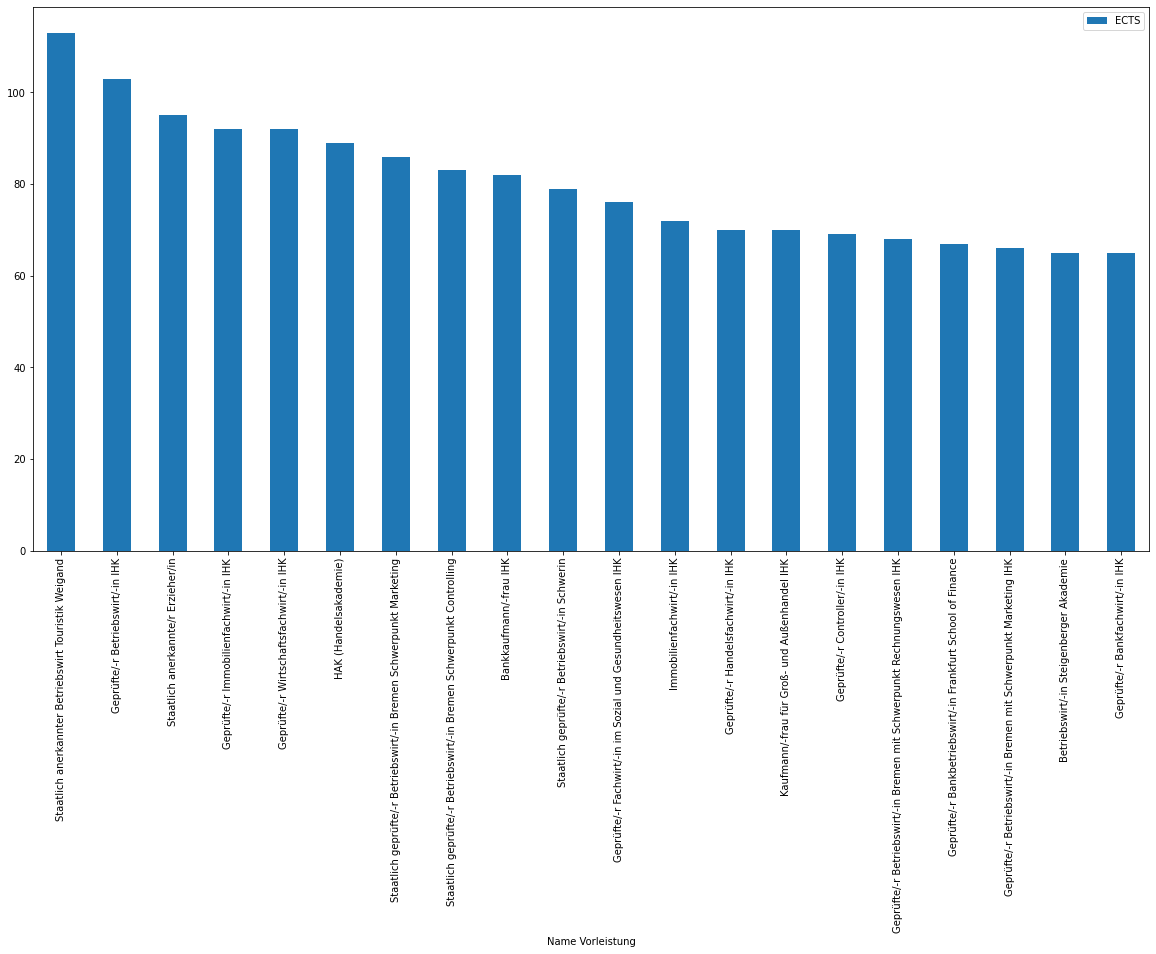

In [22]:
#@title ##**Top 20** anerkannte oder angerechnete Vorleistungen
try:
  plotHigh()
except:
  print("Es gab Probleme bei der grafischen Umsetzung. Bitte versuche es später erneut oder kontaktiere den Admin.")


***

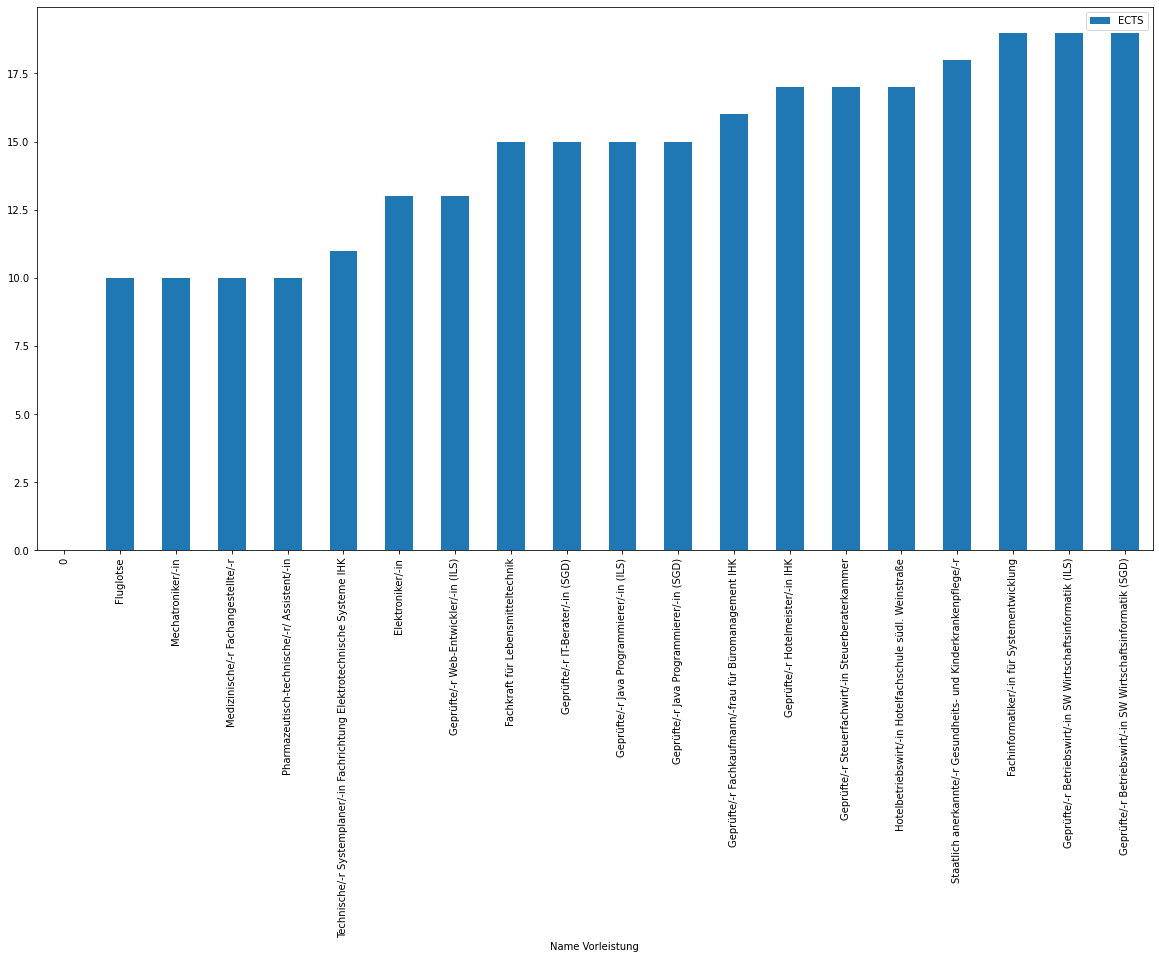

In [23]:
#@title ##**20** Vorleistungen mit der geringsten Anerkennung oder Anrechnung
try:
  plotSmall()
except:
  print("Es gab Probleme bei der grafischen Umsetzung. Bitte versuche es später erneut oder kontaktiere den Admin.")

***

In [24]:
#@title ##**Alle Vorleistungen** anzeigen
widgets.VBox([button,out])

***